<a href="https://colab.research.google.com/github/Abigail1410/Trabajo-final/blob/master/TENSOR_FLOW_GOOGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

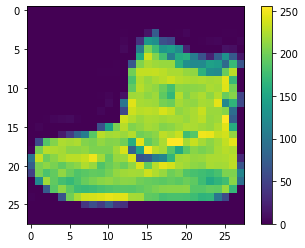

In [9]:
#Pre-procese el set de datos
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

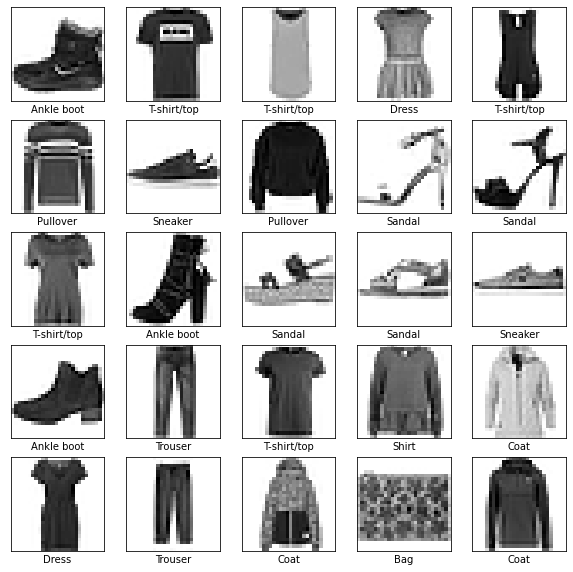

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#Construir el Modelo
#Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

#Configurar las Capas

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
#Debemos compilar el modelo

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#Entrenar el Modelo

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6048 - accuracy: 0.6784
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6648 - accuracy: 0.7510
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5656 - accuracy: 0.7982
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5373 - accuracy: 0.8142
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5173 - accuracy: 0.8213
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5045 - accuracy: 0.8272
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4910 - accuracy: 0.8336
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4861 - accuracy: 0.8362
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4792 - accuracy: 0.8382
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.477

In [14]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.82669997215271


In [0]:
#Tiempo de Hacer predicciones

In [16]:
predictions = model.predict(test_images)
predictions[0]

array([6.05059059e-28, 7.60461775e-20, 0.00000000e+00, 5.90812376e-30,
       0.00000000e+00, 2.28630435e-02, 0.00000000e+00, 1.16022155e-02,
       1.38929171e-18, 9.65534687e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

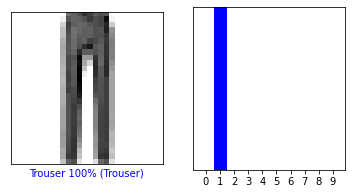

In [19]:
#Ahora vamor a Graficar esto para poder ver todo el set de la prediccion de las 10 clases.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

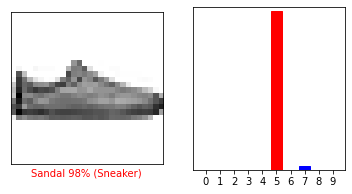

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

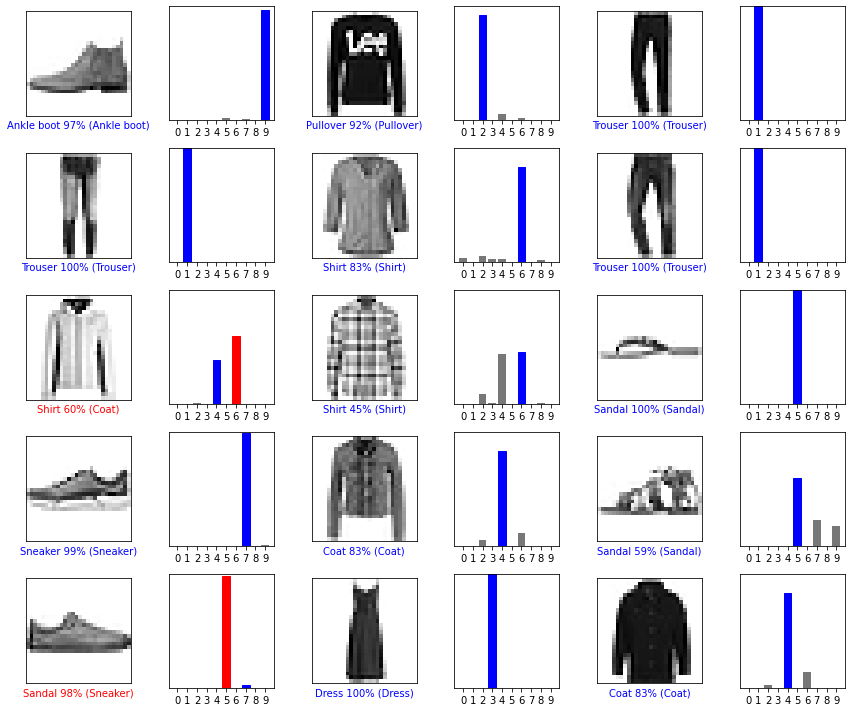

In [21]:
#Ahora vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

# Trace las primeras imágenes de prueba X, sus etiquetas predichas y las etiquetas verdaderas.
# Colorear las predicciones correctas en azul y las predicciones incorrectas en rojo.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [22]:
# Tome una imagen del conjunto de datos de prueba.
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
# Debemos agregar la imagen a un lote donde es el único miembro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.4639073e-04 2.6683592e-05 9.2404652e-01 1.2415517e-04 5.7529617e-02
  4.3034147e-17 1.7841978e-02 0.0000000e+00 8.4617706e-05 0.0000000e+00]]


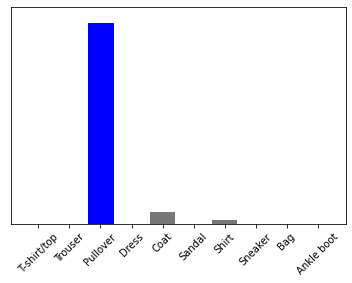

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

2

In [0]:
#Finalizamos que el modelo predice una etiqueta de 2.